In [6]:
from pathlib import Path

In [7]:
!pip install simpletransformers

In [8]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs

# Optional model configuration
model_args = ClassificationArgs()
model_args.num_train_epochs=1
model_args.overwrite_output_dir=True

#model = ClassificationModel("bert", "diptanu/fBERT", args=model_args)
model = ClassificationModel("bert", "GroNLP/hateBERT", args=model_args,use_cuda=False)

Downloading:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

C:\Users\popil\anaconda3\lib\site-packages\huggingface_hub\file_download.py:123: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\popil\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at GroNLP/hateBERT were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at GroNLP/hateBERT and are newly

Downloading:   0%|          | 0.00/151 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [9]:
import pandas as pd

df_train_olid_small = pd.read_csv(r'C:\Users\popil\Desktop\arxeia\Subjectivity_mining_assignment_3_4_data\olid-train-small.csv')
df_train_hasoc = pd.read_csv(r'C:\Users\popil\Desktop\arxeia\Subjectivity_mining_assignment_3_4_data\hasoc-train.csv')
df_test_olid = pd.read_csv(r'C:\Users\popil\Desktop\arxeia\Subjectivity_mining_assignment_3_4_data\olid-test.csv')

In [10]:
model.train_model(df_train_olid_small)

  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/732 [00:00<?, ?it/s]

(732, 0.54208197257395)

In [11]:
result, model_outputs, wrong_predictions = model.eval_model(df_test_olid)

  0%|          | 0/860 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/108 [00:00<?, ?it/s]

In [12]:
from sklearn.metrics import classification_report
import numpy as np

print(classification_report(
    y_true=df_test_olid['labels'],
    y_pred=np.argmax(model_outputs, axis=1)
))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       620
           1       0.73      0.62      0.67       240

    accuracy                           0.83       860
   macro avg       0.80      0.77      0.78       860
weighted avg       0.82      0.83      0.83       860



In [13]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(df_test_olid['labels'],np.argmax(model_outputs, axis=1))

print(cf_matrix)

[[564  56]
 [ 90 150]]


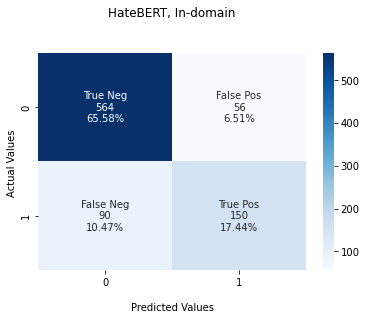

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('HateBERT, In-domain\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()